# **Atividade 2 LAB**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Cursos/Fatec /3°Semestre/EstatisticaAplicada/Dados/housing.csv',
                    sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

## Exercicio 1

In [ ]:
dados.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
# Preço
dados['MEDV'].describe()

count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64

In [ ]:
# Comodos
dados['RM'].describe()

count    489.000000
mean       6.240288
std        0.643650
min        3.561000
25%        5.880000
50%        6.185000
75%        6.575000
max        8.398000
Name: RM, dtype: float64

In [ ]:
import plotly.express as px

In [ ]:
# BoxPlot do preço
boxplot = px.box(dados, y="MEDV")
boxplot.show()

In [ ]:
# BoxPlot do Comodos
boxplot = px.box(dados, y="RM")
boxplot.show()

## Exercício 2

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

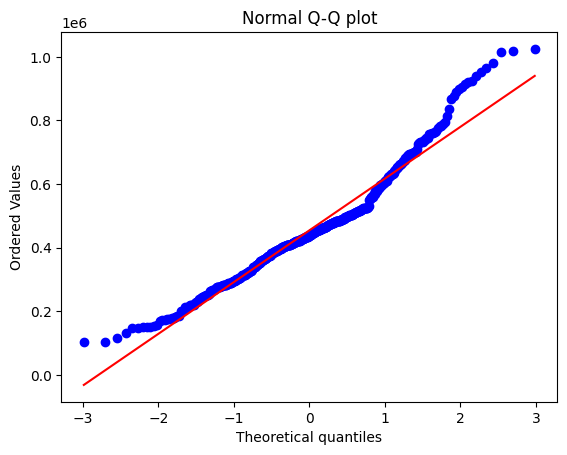

In [ ]:
stats.probplot(dados['MEDV'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

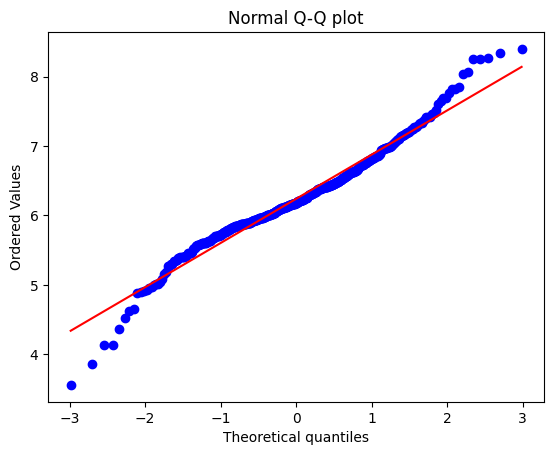

In [ ]:
stats.probplot(dados['RM'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
# Teste shapiro do MEDV
estatistica, p = stats.shapiro(dados.MEDV)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9596619009971619
p-valor: 2.5762864064304836e-10


In [ ]:
# Teste Shapiro do RM
estatistica, p = stats.shapiro(dados.RM)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9708166718482971
p-valor: 2.7085933496096004e-08


Teste Lilliefors (Kolmogorov_Sminorv)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05



In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(dados.MEDV, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.11370576407672117
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(dados.RM, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.06394344399233598
p-valor: 0.0009999999999998899


Rejeita Ho

## Exercicio 3

In [ ]:
dados['MEDV'].shape

(489,)

In [ ]:
dados['RM'].shape

(489,)

## EXERCICIO 4

In [ ]:
# Spearman
coef,p = stats.spearmanr(dados.RM,dados.MEDV)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.6240572939087419
p-valor: 3.845028634343161e-54


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
# Criação do modelo, y(independente) ~ x(dependente)
regressao = smf.ols('MEDV ~ RM', data = dados).fit()

In [ ]:
residuos = regressao.resid
residuos

0      -10289.331146
1      -33108.147994
2      105160.527797
3      111351.964481
4      143466.274289
           ...      
484    -47113.105800
485      -199.471832
486    -84207.866497
487    -91511.922771
488   -166780.598561
Length: 489, dtype: float64

### Teste de Normalidade dos resíduos
Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9591864943504333
p-valor: 2.1528526183978158e-10


In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

Modelo aprovado

## 6) (valor 1,0) Qual o coeficiente de determinação entre as variáveis?

In [ ]:
# y = m.x+ b
# m = coeficiente de x; b = intercepto
# R-squared = Desempenho do modelo
print(regressao.summary())
# F = 30,2326.X+ 0,0436
# R² = 0,998 = 99,8%

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     460.7
Date:                Wed, 29 May 2024   Prob (F-statistic):           2.05e-72
Time:                        19:45:55   Log-Likelihood:                -6406.3
No. Observations:                 489   AIC:                         1.282e+04
Df Residuals:                     487   BIC:                         1.282e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.633e+05   5.23e+04    -12.671      0.0

## 7) Apresente um gráfico com os valores observados e com a reta de regressão.

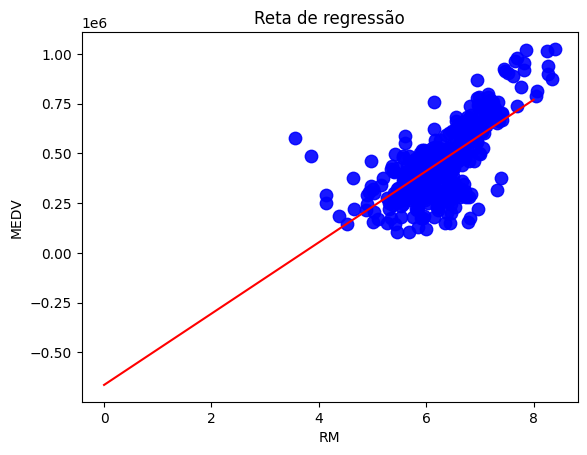

In [ ]:
plt.scatter(y=dados.MEDV, x=dados.RM, color='blue', s=80, alpha=0.9)
X_plot = np.linspace(0, 8.0)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('MEDV')
plt.xlabel('RM')
plt.show()

Estatística t:

Ho = coeficiente igual a zero : p > 0,05 (coeficiente não validado)

Ha = coeficiente diferente de zero: p <= 0,05 (coeficiente validado)

Equação: MEDV = -6.633e+05 + 1.791e+05.RM

R^2 ajustado =  0.486

In [ ]:
# mostrar só os parametros
regressao.params

Intercept   -663283.910583
RM           179098.591898
dtype: float64

9) (valor 1,0) Determine a previsão para o valor de um imóvel dessa região com 11 cômodos.

In [ ]:
valor = (-6.63*10**5) + 1.79*10**5*11
print(f'Resultado: ${valor}')

Resultado: $1306000.0


10 ) Considerando nível de significância de 0,01, há evidências para afirmar que a média dos valores médios das casas com RM (número médio de cômodos) entre 6 e 7 é igual a média dos valores médios de todas as casas? Justifique a conclusão com os resultados do teste de hipótese, destacando o teste de hipótese utilizado.

In [ ]:
# alfa = 0.01
# Afirmação = Media(RM [ x > 7]) = Media(RM)
casas_6_7 = dados.loc[dados['RM'] > 6]
casas_6_7 = casas_6_7.loc[dados['RM'] < 7]

In [ ]:
# Teste de normalidade
estatistica, p = stats.shapiro(casas_6_7)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.5926927924156189
p-valor: 2.2420775429197073e-44


In [ ]:
mediaRm = dados.RM
estatistica, p = stats.shapiro(mediaRm)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))


Estatística de teste: 0.9708166718482971
p-valor: 2.7085933496096004e-08


TESTE Z COM DUAS AMOSTRAS INDEPENDENTES

Ho = Media de valores medios maiores que 6 e menores que 7 é  igual a media total de RM: p > 0.05

Ha = Media de valores medios maiores que 6 e menores que 7 é DIFERENTE a media total de RM : p <= 0.05

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
stat, p = ztest(casas_6_7, mediaRm)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: [  3.94  19.76 128.85  80.17]
p-valor: [8.07787466e-05 7.26376912e-87 0.00000000e+00 0.00000000e+00]
